### aim: plot the observational AMOC

### date: 

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [3]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [4]:
import numpy as np
from cmocean import cm
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE')
#list of models
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/UTILS')
import lom
import utils as ut

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 12})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 12}

plt.rc('font', **font)

In [5]:
am = xr.open_dataset('./data/mocobs/moc_transports.nc')
# amv = nc.Dataset('./data/mocobs/moc_vertical.nc')
# dataset = xr.open_dataset(xr.backends.NetCDF4DataStore(amv))
# dataset.to_netcdf('./data/mocobs/moc_vertical2.nc')
amv = xr.open_dataset('./data/mocobs/moc_vertical2.nc')

In [6]:
am

<xarray.Dataset>
Dimensions:       (time: 13057)
Coordinates:
  * time          (time) datetime64[ns] 2004-04-02 ... 2022-02-15
Data variables:
    t_therm10     (time) float64 ...
    t_aiw10       (time) float64 ...
    t_ud10        (time) float64 ...
    t_ld10        (time) float64 ...
    t_bw10        (time) float64 ...
    t_gs10        (time) float64 ...
    t_ek10        (time) float64 ...
    t_umo10       (time) float64 ...
    moc_mar_hc10  (time) float64 ...
Attributes:
    Title:                         RAPID MOC timeseries
    Institution:                   National Oceanography Centre,UK
    Website:                       http://www.rapid.ac.uk/rapidmoc
    Acknowledgement:               The RAPID-MOC monitoring project is funded...
    Created_by:                    Ben Moat
    Creation_date:                 08-Sep-2023
    Principle_investigator:        Ben Moat
    Principle_investigator_email:  ben.moat@noc.ac.uk
    DOI:                           doi: 10.5285/04c79ece-3186-349a-e063-6c86a...

In [7]:
am

<xarray.Dataset>
Dimensions:       (time: 13057)
Coordinates:
  * time          (time) datetime64[ns] 2004-04-02 ... 2022-02-15
Data variables:
    t_therm10     (time) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    t_aiw10       (time) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    t_ud10        (time) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    t_ld10        (time) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    t_bw10        (time) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    t_gs10        (time) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    t_ek10        (time) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    t_umo10       (time) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    moc_mar_hc10  (time) float64 nan nan nan nan nan nan ... nan nan nan nan nan
Attributes:
    Title:                         RAPID MOC timeseries
    Institution:                   National Oceanography Centre,UK
    Website:                       http://www.rapid.ac.uk/rapidmoc
    Acknowledgement:               The RAPID-MOC monitoring project is funded...
    Created_by:                    Ben Moat
    Creation_date:                 08-Sep-2023
    Principle_investigator:        Ben Moat
    Principle_investigator_email:  ben.moat@noc.ac.uk
    DOI:                           doi: 10.5285/04c79ece-3186-349a-e063-6c86a...

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


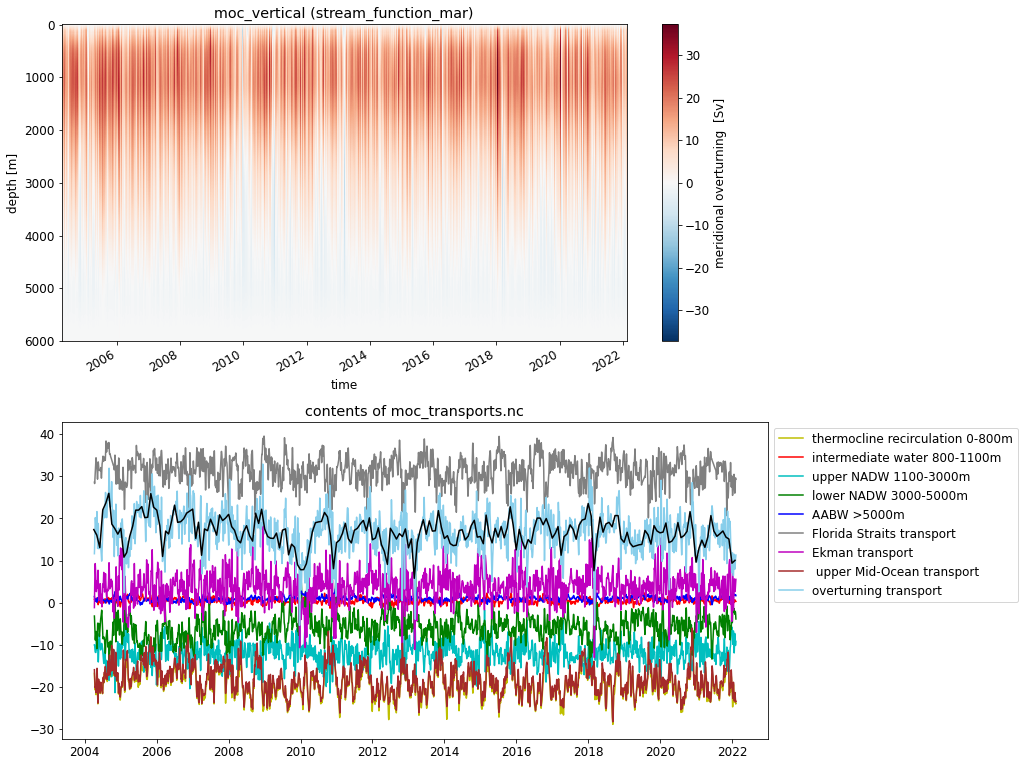

In [8]:


fact = 0.9
fig, axs = plt.subplots(2,1, figsize=(16*fact, 12*fact), facecolor='w', edgecolor='k', sharey= False)
axs = axs.ravel()

w =xr.plot.pcolormesh(amv.stream_function_mar, ax = axs[0])
axs[0].invert_yaxis()
axs[0].set_title('moc_vertical (stream_function_mar)')
axs[1].plot(am.time, am.t_therm10, 'y-', label = 'thermocline recirculation 0-800m')
axs[1].plot(am.time, am.t_aiw10, 'r-', label = 'intermediate water 800-1100m')
axs[1].plot(am.time,am.t_ud10,'c-', label = 'upper NADW 1100-3000m')
axs[1].plot(am.time,am.t_ld10,'g-', label = 'lower NADW 3000-5000m')
axs[1].plot(am.time,am.t_bw10,'b-', label = 'AABW >5000m')
axs[1].plot(am.time, am.t_gs10, linestyle = '-', color = 'grey', label = 'Florida Straits transport')
axs[1].plot(am.time, am.t_ek10, 'm-', label = 'Ekman transport')
axs[1].plot(am.time,am.t_umo10, linestyle = '-', color = 'brown', label = ' upper Mid-Ocean transport')

axs[1].plot(am.time,am.moc_mar_hc10, linestyle = '-', color = 'skyblue',  label = 'overturning transport')

# axs[1].plot(am.time,am.t_therm10 + am.t_aiw10 + am.t_ud10 + am.t_ld10 + am.t_bw10 +\
#            am.t_gs10 + am.t_ek10 + am.t_umo10, linestyle = '-', color = 'chartreuse')


axs[1].legend(bbox_to_anchor  = [1,1])

#monthly moc
monthly_moc = am['moc_mar_hc10'].resample(time='1MS').mean()
axs[1].plot(monthly_moc.time, monthly_moc, 'k-')
axs[1].set_title('contents of moc_transports.nc')

plt.tight_layout()
#axs[2].plot(am.time.groupby('time.month').mean(), am.moc_mar_hc10.groupby('time.month').mean(), 'k-')

Text(0.5, 1.0, 'moc_mar_hc10 from moc_transports.nc (vert. lines) \n and stream_function_mar from moc_vertical.nc \n for points in timeseries')

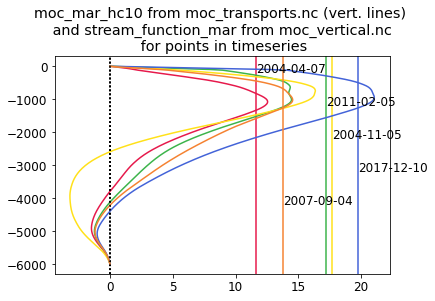

In [9]:
ind = 10

inds = [10, 5000, 435, 10000, 2500, ]
cols = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', \
        '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff',\
        '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1',\
        '#000075', '#808080', '#ffffff', '#000000']
plt.figure()
i = 0
for ind in inds:
    
    ttim = str(amv.time[ind].values)
    ttim = ttim[0:10]
    test = (amv.stream_function_mar[:,ind])
    test2 = am.moc_mar_hc10[ind]
    test3 = am.t_ek10[ind]
    test4 = am.t_gs10[ind]
    test5 = am.t_umo10[ind]
    plt.text(test2,-1000*i-200, ttim)
    
    tplt = test2 + test3 + test5
    tplt = test2# = am.moc_mar_hc10[ind]
    plt.plot(test,-test.depth, color = cols[i])
    plt.axvline(tplt, color = cols[i])

    plt.axvline(0, color = 'k', linestyle = ':')
    i = i+1
    
plt.title('moc_mar_hc10 from moc_transports.nc (vert. lines) \n and stream_function_mar from moc_vertical.nc \n for points in timeseries')

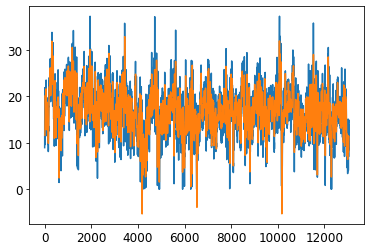

In [14]:
tstream = amv.stream_function_mar[:,:].values
tmoc = am.moc_mar_hc10[:].values
tstreammax = np.zeros_like(tmoc)

for i in range(0,13057):
    tstreammax[i] = np.nanmax(tstream[:,i])
    
plt.plot(np.arange(0,13057),tstreammax)
plt.plot(np.arange(0,13057),tmoc)

In [12]:
print(np.shape(tstream))

(307, 13057)
